# PyTorch Tutorial, ToTensor():
#### What does ToTensor() do to images
- Creating a Numpy.ndarray to see the effect of ToTensor() 
- Defining a Numpy image of type uint8, and see how ToTensor() changes it
- Downloading the **CIFAR10** dataset using **datasets.CIFAR10** without using ToTensor()
- Showing some images of **CIFAR10** with both Numpy arrays, and Torch Tensors (after applying ToTensor())
<br>https://github.com/ostad-ai/PyTorch-Tutorial

In [1]:
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np

**ToTensor(()** converts a PIL image or Numpy array ($H\times W\times C$) in the range [0, 255] to a torch.FloatTensor with shape ($C\times H \times W$) in the range [0,1]. Reminder: C for Colors, H for Height, and W for Width. 
<br>The PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1).
<br>The numpy.ndarray has dtype = np.uint8. 
<br>Otherwise, it does not scale the values of the input.

In [2]:
# an example to see how the size, type, and scale of array are changed with ToTensor()
array_np=np.array([[[200,100],[150,250],[50,96]]],dtype=np.uint8)
array_tn=ToTensor()(array_np)
print('Shape of the Numpy array:',array_np.shape)
print('Its shape, after using ToTensor:', array_tn.shape)
print(f'Type of Numpy array:{array_np.dtype}')
print(f'Its type, after using ToTensor:{array_tn.dtype}')
print(f'Range of Numpy array:[{array_np.min()},{array_np.max()}]')
print(f'Its range, after using ToTensor:[{array_tn.min()},{array_tn.max()}]')

Shape of the Numpy array: (1, 3, 2)
Its shape, after using ToTensor: torch.Size([2, 1, 3])
Type of Numpy array:uint8
Its type, after using ToTensor:torch.float32
Range of Numpy array:[50,250]
Its range, after using ToTensor:[0.19607843458652496,0.9803921580314636]


This time we apply **ToTensor()** to a **Numpy image** that we create here:

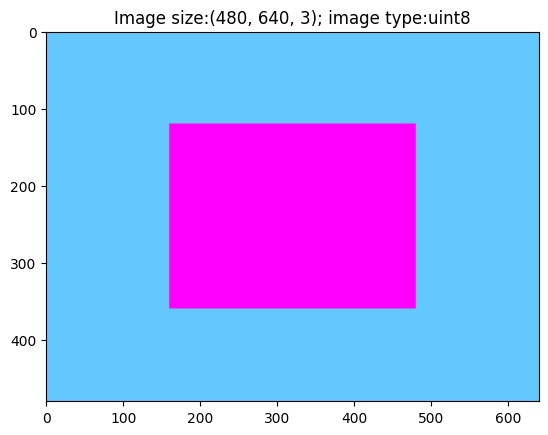

In [3]:
# creating a Numpy image of type: uint8
rows,cols,colors=480,640,3
image_np=(100,200,255)*np.ones((rows,cols,colors))
image_np=image_np.astype('uint8')
image_np[rows//4:3*rows//4,cols//4:3*cols//4]=(255,0,255)
plt.imshow(image_np)
plt.title(f'Image size:{image_np.shape}; image type:{image_np.dtype}')
plt.show()

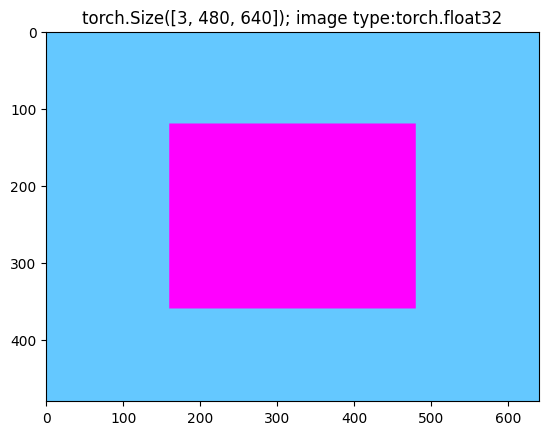

In [4]:
# applying toTensor to the Numpy image to see the changes of the array type and shape
image_tn=ToTensor()(image_np)
plt.imshow(image_tn.numpy().transpose(1,2,0))
plt.title(f'{image_tn.shape}; image type:{image_tn.dtype}')
plt.show()

Let's download the **CIFAR10** dataset. <br>We, on purpose, don't use **transform=ToTensor()** to get the images in Numpy arrays.

In [5]:
training_data=datasets.CIFAR10(root='CIFAR10',train=True,download=True)#, transform=ToTensor()
#test_data=datasets.CIFAR10(root='CIFAR10',train=False,download=True)

Files already downloaded and verified


In [6]:
data,targets=training_data.data,training_data.targets
print(f'Shape of training samples:{data.shape}')
print(f'The number of training samples:{len(data)}')
print(f'The size of each image:{data.shape[1:]}, image type:{data[0].dtype}')
if isinstance(data,np.ndarray):
    print('data is a Numpy ndarray')
print('-----------')
if isinstance(targets, np.ndarray):
    print(f'targets is a Numpy ndarray with {targets.shape[0]} elements')
    print(f'The number of classes:{len(np.unique(np.asarray(targets)))}')
elif isinstance(targets, list):
    print(f'targets is a list with {len(targets)} elements')
    print(f'The number of classes:{len(set(targets))}')
print(f'classes:{training_data.classes}')

Shape of training samples:(50000, 32, 32, 3)
The number of training samples:50000
The size of each image:(32, 32, 3), image type:uint8
data is a Numpy ndarray
-----------
targets is a list with 50000 elements
The number of classes:10
classes:['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Let's display some of the **training samples** with the help of Numpy

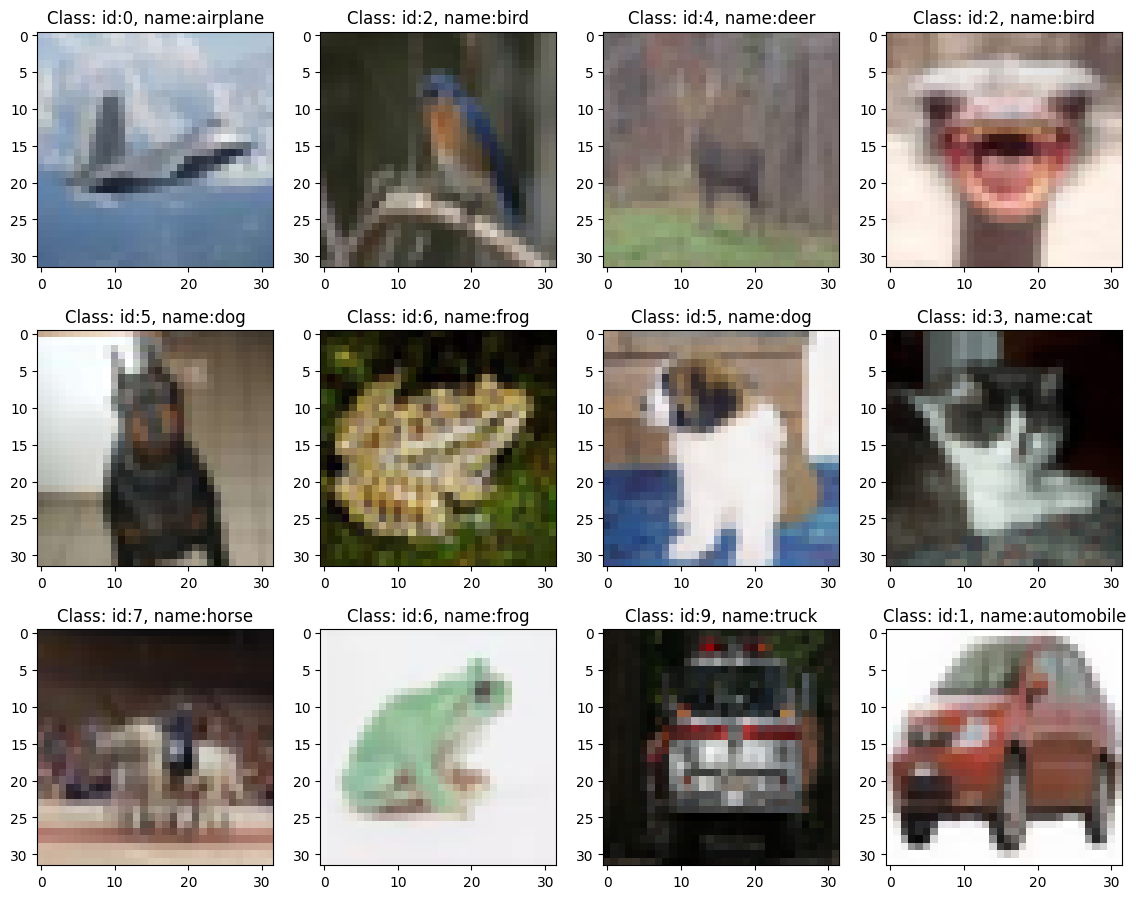

In [7]:
# we choose some images of the training samples randomly and display them
Nimages=12
indexes=np.random.choice(len(data),Nimages,replace=False)
plt.figure(figsize=(14,11))
for i in range(Nimages):
    plt.subplot(3,4,i+1)
    plt.imshow(data[indexes[i]])
    plt.title(f'Class: id:{targets[indexes[i]]}, name:{training_data.classes[targets[indexes[i]]]}')
plt.show()

This time, use **ToTensor()** to convert the training samples (images) into a normalized FloatTensor.
<br> Then, display some of them.

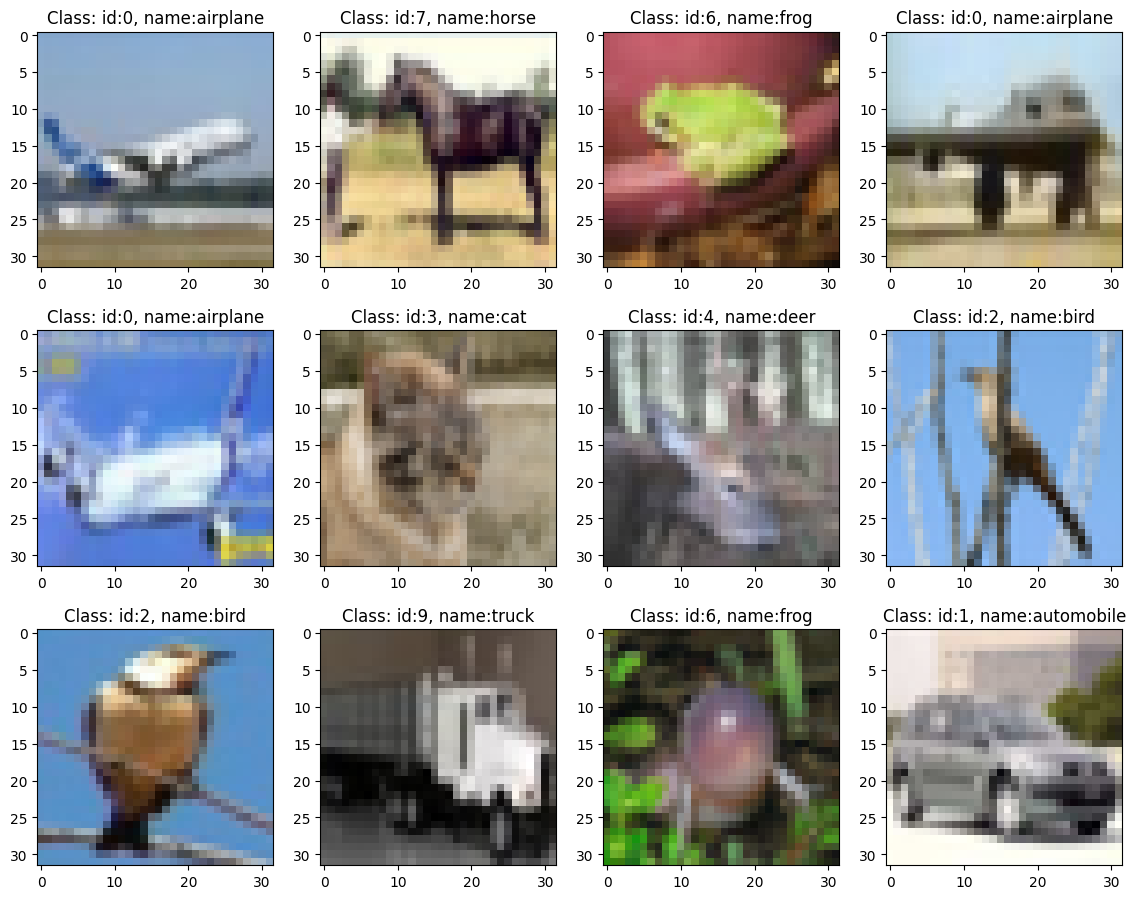

In [8]:
trans=ToTensor()
data_tn=torch.FloatTensor(len(data),data.shape[3],data.shape[1],data.shape[2])
for i in range(len(data)):
    data_tn[i]=trans(data[i])
Nimages=12
indexes=torch.randperm(len(data))[:Nimages]
plt.figure(figsize=(14,11))
for i in range(Nimages):
    plt.subplot(3,4,i+1)
    plt.imshow(data_tn[indexes[i]].numpy().transpose(1,2,0))
    plt.title(f'Class: id:{targets[indexes[i]]}, name:{training_data.classes[targets[indexes[i]]]}')
plt.show()